In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [18]:

df = pd.read_csv('data/letter-recognition.csv')

df.insert(0, 'ID', range(1, 1 + len(df)))

temp_df = df[df['lettr'].isin(['A','Y','C'])]


temp_df.to_csv('data/letter-recognition-processed.csv', index=False)




In [20]:
df = pd.read_csv('data/letter-recognition-processed.csv')
df.head()

ID lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0   8     A      1      1      3     2      1      8      2      2      2   
1  18     C      7     10      5     5      2      6      8      6      8   
2  26     C      6     11      7     8      3      7      8      7     11   
3  51     Y      7     11      9     8      8      9      5      6      4   
4  53     Y      2      4      4     3      2      6     10      1      7   

   xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0      8      2      8      1      6      2      7  
1     11      7     11      2      8      5      9  
2      4      7     14      1      7      4      8  
3      7      8      8      3      9      8      3  
4      8     11      8      1     11      2      7

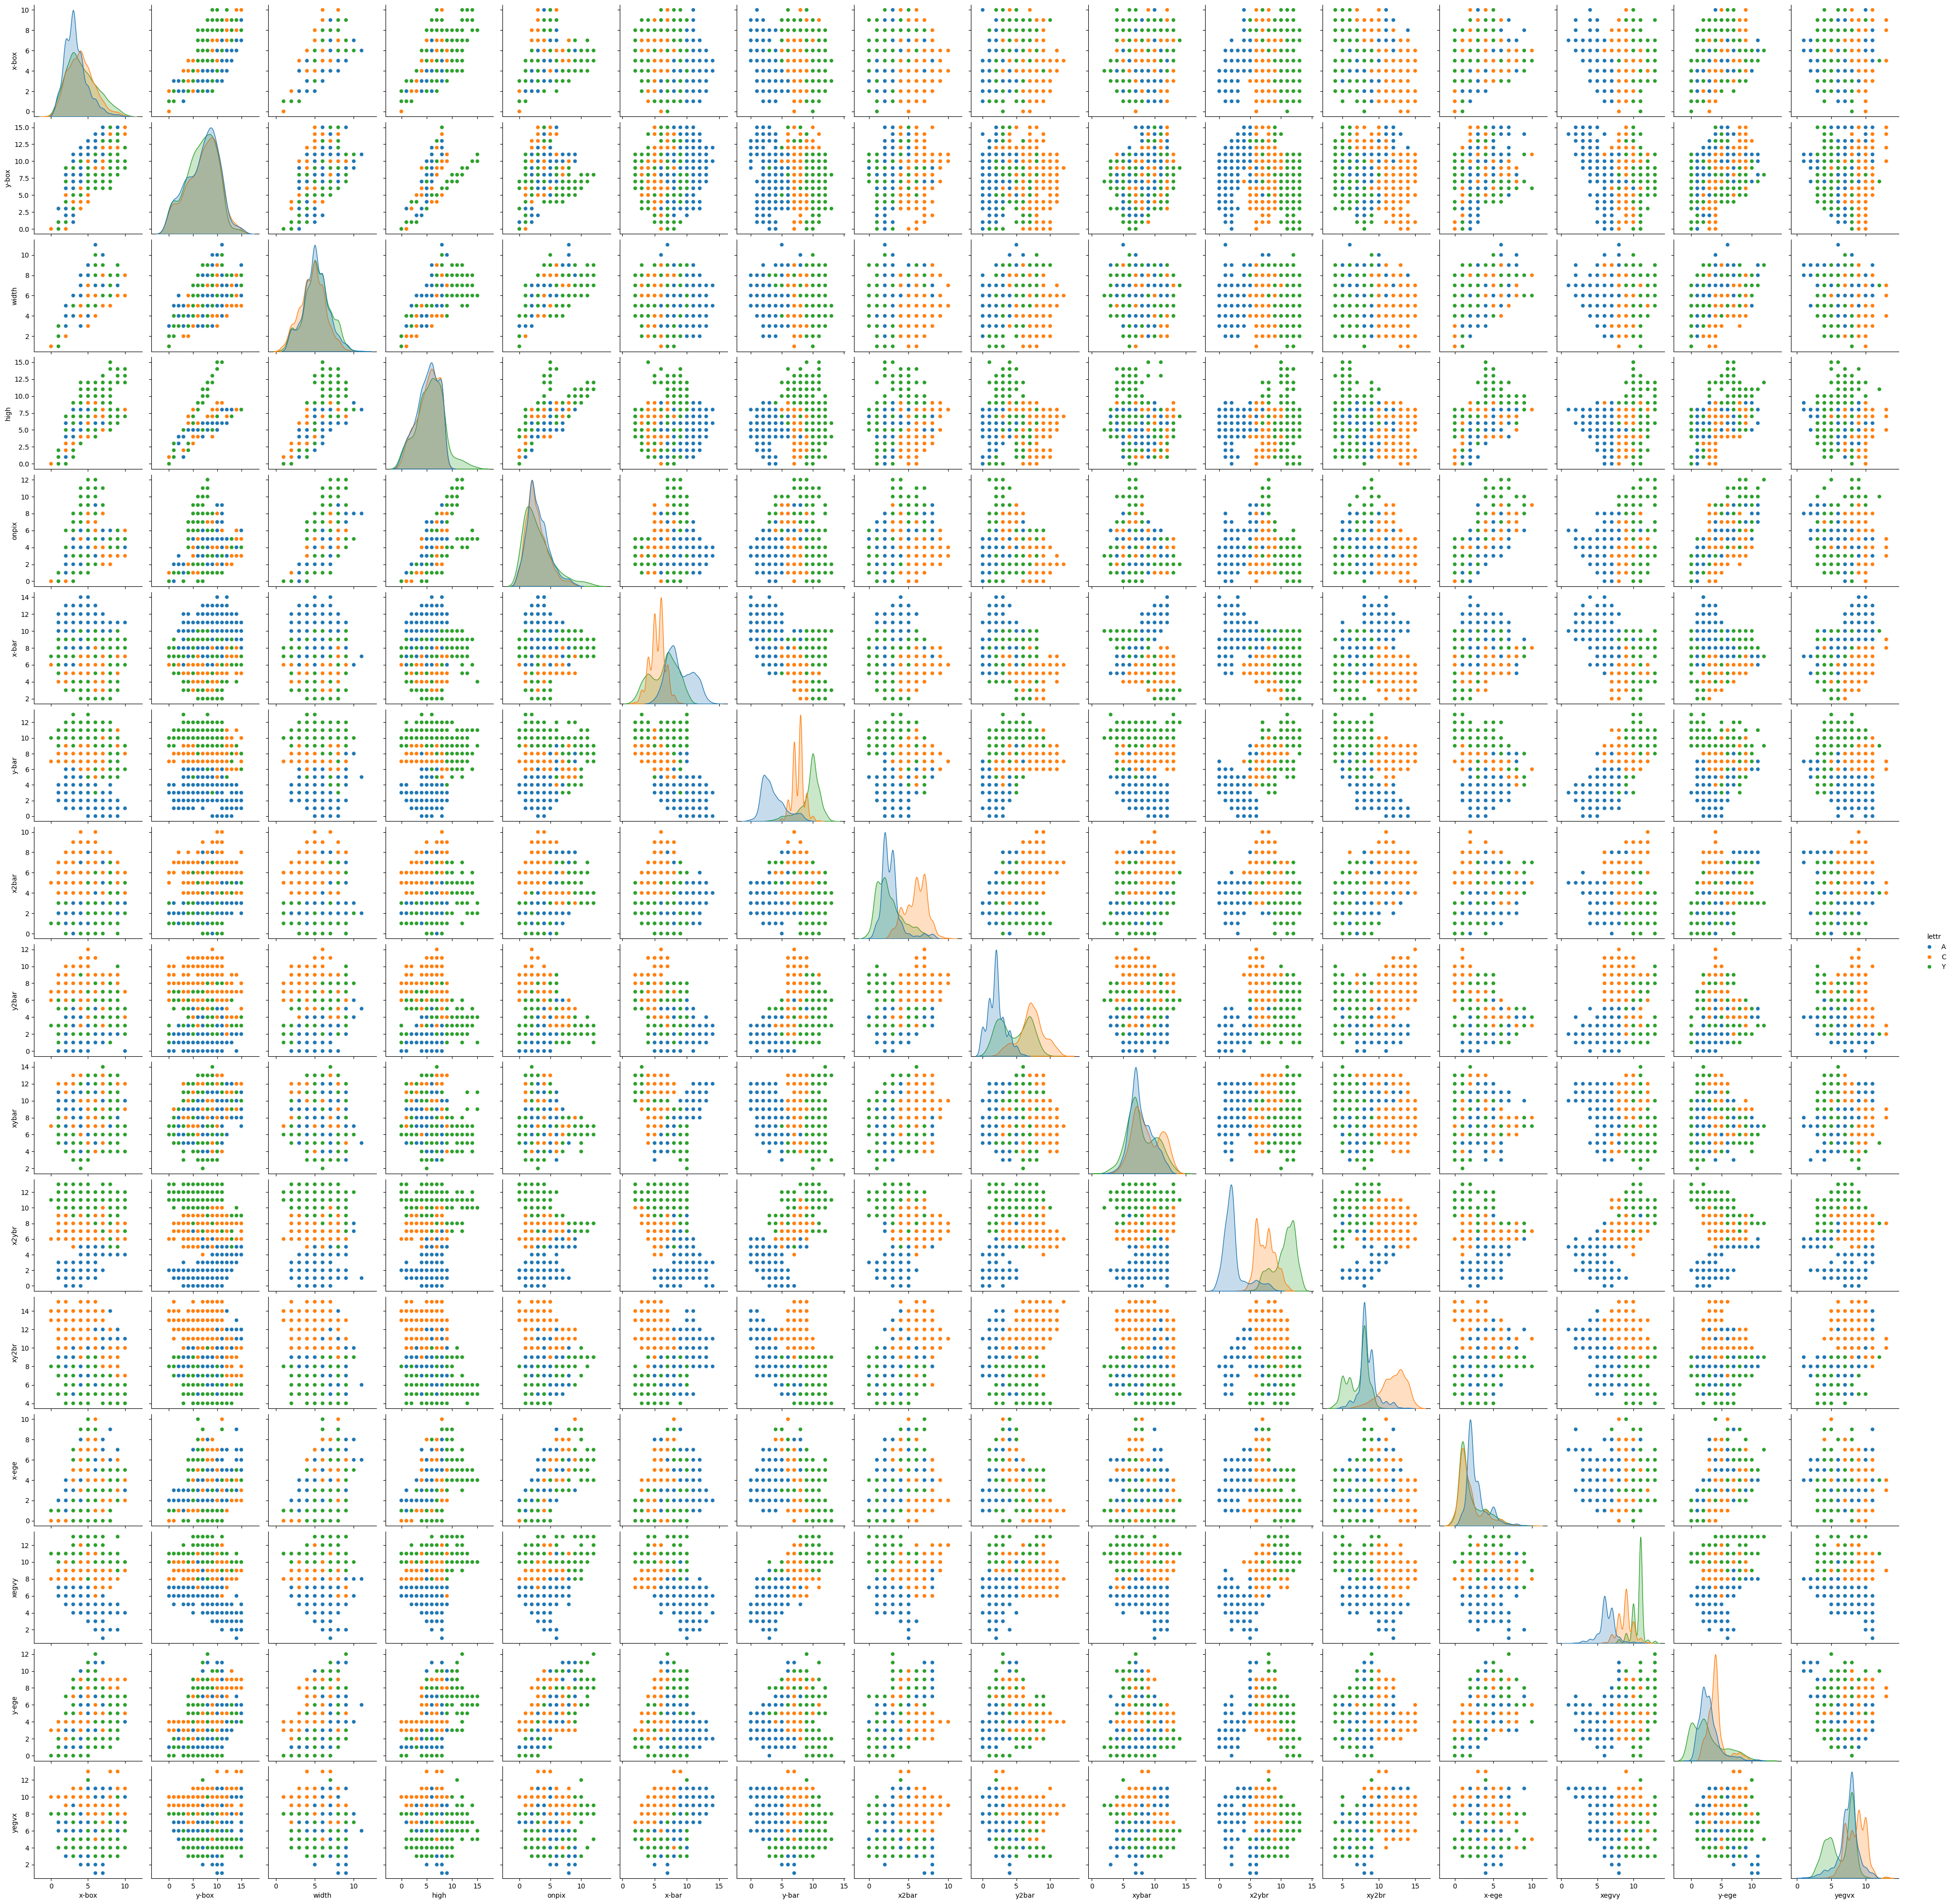

In [ ]:
# view the relationships between variables; color code by letter type
# tar ca 45s att köra
sns.pairplot(df.drop(labels=['ID'], axis=1), hue='lettr')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[["x-box","y-box","width","high","onpix",
                                                        "x-bar","y-bar","x2bar","y2bar","xybar",
                                                        "x2ybr","xy2br","x-ege","xegvy","y-ege",
                                                        "yegvx"]],
                                                        df['lettr'], random_state=12, test_size=0.25)

In [23]:
# see how data has been split
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (1733, 16)
y_train shape: (1733,)
X_test shape: (578, 16)
y_test shape: (578,)


In [25]:
# Display the training data!
print(X_train, y_train)

      x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
522       3      6      5     4      2     10     11      2      7      3   
2060      5      7      5     5      3      6      8      6      8     12   
896       6      9      7     7      8      5      6      4      5      7   
665       4     11      5     8      3      8     11      1      3      7   
1906      3      6      4     4      1      6      7      6     10      7   
...     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
1987      5      6      4     9      3      9      9      2      3      6   
1283      2      3      4     4      0      7     10      2      2      7   
1414      8     15      6     8      4      8      3      3      2      7   
1691      3      7      5     4      2      7      4      3      1      6   
1867      2      1      3     2      1      6      8      7      7      8   

      x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
522      11      8      1 

In [26]:
# Display the TEST data!
#print(len(X_test))
print(y_test)

67      C
1919    Y
1345    C
1156    Y
377     A
       ..
1034    C
421     C
32      A
73      Y
198     A
Name: lettr, Length: 578, dtype: object


In [27]:
# initialize the Estimator object
# create an instance of the KNeighborsClassifier class (scikit-learn), with the k number of neighbors
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [28]:
# fit the model to training set in order to predict classes later
# The fit method in k-NN stores the training data (X_train and y_train) within the classifier object. 
# Unlike many other machine learning algorithms, k-NN doesn't perform any complex computations or model training 
# during this step. It just memorizes the training dataset.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
# The process of finding the nearest neighbors occurs!! Create a prediction array y_pred for our test set
y_pred = knn.predict(X_test)
print(y_pred)

['C' 'Y' 'C' 'Y' 'A' 'A' 'A' 'Y' 'Y' 'C' 'Y' 'C' 'Y' 'A' 'C' 'Y' 'A' 'C'
 'Y' 'C' 'C' 'A' 'A' 'Y' 'A' 'A' 'A' 'A' 'Y' 'A' 'C' 'C' 'Y' 'C' 'Y' 'C'
 'C' 'C' 'A' 'C' 'A' 'Y' 'Y' 'Y' 'Y' 'A' 'Y' 'Y' 'C' 'A' 'Y' 'A' 'C' 'Y'
 'Y' 'Y' 'A' 'Y' 'C' 'Y' 'C' 'Y' 'C' 'Y' 'C' 'A' 'C' 'A' 'Y' 'Y' 'A' 'Y'
 'C' 'C' 'C' 'A' 'Y' 'C' 'Y' 'C' 'C' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'A' 'C'
 'A' 'Y' 'C' 'C' 'Y' 'A' 'C' 'A' 'A' 'Y' 'C' 'C' 'Y' 'Y' 'C' 'A' 'C' 'C'
 'Y' 'C' 'A' 'A' 'C' 'C' 'Y' 'A' 'Y' 'Y' 'A' 'C' 'Y' 'Y' 'C' 'C' 'Y' 'C'
 'Y' 'Y' 'Y' 'A' 'A' 'C' 'Y' 'Y' 'Y' 'Y' 'C' 'A' 'C' 'Y' 'A' 'C' 'A' 'A'
 'Y' 'C' 'C' 'A' 'C' 'A' 'C' 'A' 'C' 'Y' 'Y' 'A' 'A' 'C' 'Y' 'C' 'C' 'Y'
 'Y' 'Y' 'C' 'C' 'A' 'A' 'C' 'A' 'A' 'A' 'Y' 'C' 'A' 'Y' 'A' 'A' 'C' 'Y'
 'Y' 'A' 'Y' 'Y' 'Y' 'A' 'Y' 'Y' 'C' 'C' 'C' 'A' 'Y' 'C' 'C' 'Y' 'Y' 'Y'
 'Y' 'Y' 'A' 'A' 'A' 'Y' 'A' 'C' 'Y' 'C' 'Y' 'A' 'C' 'C' 'A' 'C' 'C' 'Y'
 'Y' 'Y' 'C' 'A' 'C' 'Y' 'Y' 'C' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'A' 'A' 'A' 'Y'
 'Y' 'A' 'Y' 'C' 'C' 'C' 'Y' 'C' 'C' 'C' 'Y' 'C' 'C

In [32]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

print (confusion_matrix)

Predicted    A    C    Y
Actual                  
A          190    0    0
C            0  188    1
Y            1    0  198


In [33]:
# based on the training dataset, our model predicts the following for the test set:
pd.concat([X_test, y_test, pd.Series(y_pred, name='Predicted', index=X_test.index)], 
          ignore_index=False, axis=1)

x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
67        1      0      1     1      0      6      7      6      8      7   
1919      2      1      4     3      2      8     11      1      7      5   
1345      4      8      5     6      3      3      8      5      7     10   
1156      4      4      6     6      7      9      4      5      3      7   
377       1      3      2     2      1     10      2      3      1      9   
...     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
1034      3     10      4     8      3      5      7      6      7      7   
421       5      9      6     6      3      5      9      7      8      5   
32        6      9      8     8      8      8      7      3      5      7   
73        3     10      5     8      2      8     10      1      3      6   
198       3     11      6     8      4     12      2      2      2      9   

      x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx lettr Predicted  
67        6     14      0      8      4     10     C         C  
1919     11      8      1     11      2      8     Y         Y  
1345     10     13      1      8      3      7     C         C  
1156      7      8      5      9      4      8     Y         Y  
377       2      9      2      6      1      7     A         A  
...     ...    ...    ...    ...    ...    ...   ...       ...  
1034      6     13      1      8      4     10     C         C  
421       8     14      2      7      5      8     C         C  
32        8      8      6      8      4      5     A         A  
73       12      8      1     11      0      8     Y         Y  
198       2      9      2      6      3      8     A         A  

[578 rows x 18 columns]

In [34]:
#  Compute the ACCURACY measurement of this model 
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 1.00
